In [1]:
!python -m pip install twint
!pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
#!pip install nest_asyncio

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to c:\users\rafi\appdata\local\temp\pip-install-2vb1ig9w\twint_e9980b31b9b64391a7489e2211fee50d
  Resolved https://github.com/twintproject/twint.git to commit origin/master


  Running command git clone -q https://github.com/twintproject/twint.git 'C:\Users\Rafi\AppData\Local\Temp\pip-install-2vb1ig9w\twint_e9980b31b9b64391a7489e2211fee50d'
  Running command git checkout -q origin/master


In [2]:
!pip install sqlite3

ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


In [3]:
import twint    
import nest_asyncio

# utiliza la libreria de TWINT para escrappear twitter y obtener la informacion deseada

nest_asyncio.apply()
for i in range(50):
    print(f"Scraping.... {i+1}/50")
    for n in range(1,8):
        # Configuracion
        c = twint.Config()
        c.Search = '@TheBridge_Tech'
        # Guardar en CSV
        c.Store_csv = True
        c.Output = f'data/raw_tweets_{n}.csv'
        # especificar fecha
        c.Since = f'2022-0{n}-01 00:00:00'
        c.Until = f'2022-0{n+1}-01 00:00:00'
        c.Hide_output = True
        c.Debug = True
        # Run
        try:
            twint.run.Search(c)
        except Exception as e:
            print(e)


Scraping.... 1/50
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
Scraping.... 2/50
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this 

In [4]:
import pandas as pd
df_1 = pd.read_csv("data/raw_tweets_1.csv").drop_duplicates()
df_2 = pd.read_csv("data/raw_tweets_2.csv").drop_duplicates()
df_3 = pd.read_csv("data/raw_tweets_3.csv").drop_duplicates()
df_4 = pd.read_csv("data/raw_tweets_4.csv").drop_duplicates()
df_5 = pd.read_csv("data/raw_tweets_5.csv").drop_duplicates()
df_6 = pd.read_csv("data/raw_tweets_6.csv").drop_duplicates()
df_7 = pd.read_csv("data/raw_tweets_7.csv").drop_duplicates()


In [5]:
df_raw = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7], axis=0)

In [6]:
df_raw.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
columns = ['id','date','user_id','username','name','tweet','replies_count', 'retweets_count', 'likes_count']

In [8]:
df = df_raw.loc[:,columns].sort_values(by='date').reset_index(drop=True)

In [9]:
df.to_csv("data/clean_data.csv")

In [10]:
df

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count
0,1478637395289378817,2022-01-05,966573471663828992,pymesmagazine,PymesMagazine,¿Quieres formarte en una de las profesiones qu...,0,0,3
1,1479787660910768132,2022-01-08,10045342,cmarchena,Carlos A. Marchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",0,0,4
2,1480228635294449667,2022-01-09,183583012,ing_titiritero,Ingeniero Titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0
3,1481340966866989063,2022-01-12,41545659,nodosenlared,Mario Lopez de Avila,Ciclo de Conferencias sobre Inteligencia Artif...,0,1,6
4,1483469787078533123,2022-01-18,1162694149956603904,thebridge_tech,The Bridge,Del periodismo al marketing digital 🤸 esta es ...,0,0,0
...,...,...,...,...,...,...,...,...,...
306,1546817334882476032,2022-07-12,1162694149956603904,thebridge_tech,The Bridge,¡Descubre la experiencia de Dani! ▶ Dani estud...,0,2,0
307,1547209900874506241,2022-07-13,1232276995796586499,inescalabuig2,Ines Calabuig,Hoy hemos tenido una súper visita a nuestras o...,0,3,6
308,1547230643561664515,2022-07-13,1088261225153060864,gohubventures,GoHub Ventures,🧑‍🎓Los emprendedores y profesionales digitales...,0,1,4
309,1547209900874506241,2022-07-13,1232276995796586499,inescalabuig2,Ines Calabuig,Hoy hemos tenido una súper visita a nuestras o...,0,3,7


###  Almacenarlos en una base de datos SQL en 2 tablas diferentes a tu elección

In [11]:
df_user = df.filter(['id', 'user_id','username', 'name'])

In [12]:
df_tweets = df.filter([ 'date', 'tweet', 'name',   'replies_count', 'retweets_count', 'likes_count'])

In [13]:

import sqlite3

conn = sqlite3.connect("pythonsqlite.db")

##push the dataframe to sql 
df.to_sql("df_user", conn, if_exists="replace")

conn.execute(
    """
    create table Users as 
    select * from df_user
    """)



OperationalError: table Users already exists

In [ ]:
df.to_sql("df_tweets", conn, if_exists="replace")

conn.execute(
    """
    create table Tweets as 
    select * from df_tweets
    """)


### Analisis de Datos

In [14]:
df

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count
0,1478637395289378817,2022-01-05,966573471663828992,pymesmagazine,PymesMagazine,¿Quieres formarte en una de las profesiones qu...,0,0,3
1,1479787660910768132,2022-01-08,10045342,cmarchena,Carlos A. Marchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",0,0,4
2,1480228635294449667,2022-01-09,183583012,ing_titiritero,Ingeniero Titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0
3,1481340966866989063,2022-01-12,41545659,nodosenlared,Mario Lopez de Avila,Ciclo de Conferencias sobre Inteligencia Artif...,0,1,6
4,1483469787078533123,2022-01-18,1162694149956603904,thebridge_tech,The Bridge,Del periodismo al marketing digital 🤸 esta es ...,0,0,0
...,...,...,...,...,...,...,...,...,...
306,1546817334882476032,2022-07-12,1162694149956603904,thebridge_tech,The Bridge,¡Descubre la experiencia de Dani! ▶ Dani estud...,0,2,0
307,1547209900874506241,2022-07-13,1232276995796586499,inescalabuig2,Ines Calabuig,Hoy hemos tenido una súper visita a nuestras o...,0,3,6
308,1547230643561664515,2022-07-13,1088261225153060864,gohubventures,GoHub Ventures,🧑‍🎓Los emprendedores y profesionales digitales...,0,1,4
309,1547209900874506241,2022-07-13,1232276995796586499,inescalabuig2,Ines Calabuig,Hoy hemos tenido una súper visita a nuestras o...,0,3,7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              311 non-null    int64 
 1   date            311 non-null    object
 2   user_id         311 non-null    int64 
 3   username        311 non-null    object
 4   name            311 non-null    object
 5   tweet           311 non-null    object
 6   replies_count   311 non-null    int64 
 7   retweets_count  311 non-null    int64 
 8   likes_count     311 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 22.0+ KB


### ¿Cuál es el tweet con mayor repercusión social? 

In [16]:
df_tweets.loc[df_tweets['likes_count'].idxmax()]

date                                                     2022-06-11
tweet             🚨27/7 - 7:30PM - 🎙️PODCAST PRESENCIAL 📌MADRID,...
name                                                   Heavy Mental
replies_count                                                    13
retweets_count                                                   14
likes_count                                                      36
Name: 188, dtype: object

In [17]:
df.likes_count.sort_values(ascending=False)

188    36
284    23
270    22
220    17
256    16
       ..
199     0
71      0
73      0
74      0
310     0
Name: likes_count, Length: 311, dtype: int64

###  ¿Cuál es el usuario que más menciona a la escuela?

In [18]:
df.groupby('username').count().sort_values(ascending=False, by='name') #@TheBridge_tech

,id,date,user_id,name,tweet,replies_count,retweets_count,likes_count
username,,,,,,,,
thebridge_tech,73,73,73,73,73,73,73,73
heavymental_es,23,23,23,23,23,23,23,23
digitalbourne,9,9,9,9,9,9,9,9
mulder01198676,9,9,9,9,9,9,9,9
joobid,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...
eleconomistacv,1,1,1,1,1,1,1,1
eioua_aprendiz,1,1,1,1,1,1,1,1
didacjo1,1,1,1,1,1,1,1,1


### ¿En qué mes se concentra el mayor número de tweets?

In [19]:
df.date = pd.to_datetime(df.date)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              311 non-null    int64         
 1   date            311 non-null    datetime64[ns]
 2   user_id         311 non-null    int64         
 3   username        311 non-null    object        
 4   name            311 non-null    object        
 5   tweet           311 non-null    object        
 6   replies_count   311 non-null    int64         
 7   retweets_count  311 non-null    int64         
 8   likes_count     311 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 22.0+ KB


In [21]:
df.groupby(df.date.dt.month)['tweet'].count()


date
1     17
2     23
3     27
4     49
5     50
6    128
7     17
Name: tweet, dtype: int64

El mes 6 fue el que mas veces se tuitteó

### ¿Qué palabras son más frecuentes?
#### Las 100 mas frecuentes son ...

In [ ]:
#pip install nltk


Note: you may need to restart the kernel to use updated packages.


[('de', 383),
 ('en', 212),
 ('@TheBridge_Tech', 203),
 ('y', 153),
 ('la', 151),
 ('el', 128),
 ('a', 125),
 ('que', 118),
 ('con', 77),
 ('@HeavyMental_es', 69),
 ('las', 66),
 ('para', 66),
 ('@Recuenco', 64),
 ('@GuillermoDeHaro', 63),
 ('un', 62),
 ('por', 51),
 ('los', 47),
 ('del', 43),
 ('una', 39),
 ('@_miki', 34),
 ('es', 32),
 ('@DavidAlayon', 32),
 ('lo', 31),
 ('no', 31),
 ('@Alienta', 29),
 ('se', 28),
 ('sobre', 25),
 ('más', 24),
 ('te', 19),
 ('#bootcamp', 19),
 ('ya', 19),
 ('nos', 19),
 ('El', 17),
 ('su', 16),
 ('La', 16),
 ('Si', 15),
 ('Gracias', 14),
 ('al', 13),
 ('todos', 13),
 ('En', 12),
 ('hay', 12),
 ('Hoy', 12),
 ('pero', 12),
 ('han', 12),
 ('@Mulder01198676', 12),
 ('futuro', 11),
 ('digital', 11),
 ('tu', 11),
 ('No', 11),
 ('como', 11),
 ('@TheBridge_Tech.', 11),
 ('nuestro', 11),
 ('presentación', 11),
 ('@arey', 11),
 ('@heavymental', 11),
 ('son', 10),
 ('este', 10),
 ('@nodosenlared', 10),
 ('becas', 10),
 ('alumnos', 10),
 ('si', 10),
 ('talento',

In [22]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')

In [23]:
df['clean_tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
from collections import Counter
Counter(" ".join(df["clean_tweet"]).split()).most_common(100)


[('@TheBridge_Tech', 225),
 ('@Recuenco', 83),
 ('@GuillermoDeHaro', 80),
 ('@HeavyMental_es', 80),
 ('@Alienta', 45),
 ('@_miki', 35),
 ('@DavidAlayon', 32),
 ('El', 19),
 ('#bootcamp', 19),
 ('La', 16),
 ('Si', 15),
 ('Gracias', 14),
 ('Hoy', 13),
 ('En', 12),
 ('digital', 12),
 ('si', 12),
 ('@Mulder01198676', 12),
 ('futuro', 11),
 ('No', 11),
 ('@TheBridge_Tech.', 11),
 ('presentación', 11),
 ('@arey', 11),
 ('libro', 11),
 ('@heavymental', 11),
 ('@nodosenlared', 10),
 ('alumnos', 10),
 ('becas', 10),
 ('primera', 10),
 ('the', 10),
 ('talento', 10),
 ('#DataScience', 9),
 ('¡Gracias', 9),
 ('hacer', 9),
 ('@Gonzalomartin', 9),
 ('Desarrollo', 8),
 ('Web', 8),
 ('personas', 8),
 ('evento', 8),
 ('@ENCamaraSevilla', 8),
 ('formación', 8),
 ('junto', 8),
 ('colaboración', 8),
 ('tecnología', 8),
 (',', 8),
 ('▪️', 8),
 ('sector', 8),
 ('@bertinha84', 8),
 ('@Globant', 8),
 ('vida', 8),
 ('@tiscar', 8),
 ('Full-stack', 7),
 ('👉', 7),
 ('#datascience', 7),
 ('digitales', 7),
 ('mano'

### ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?

In [25]:
import seaborn as sn
import matplotlib.pyplot as plt

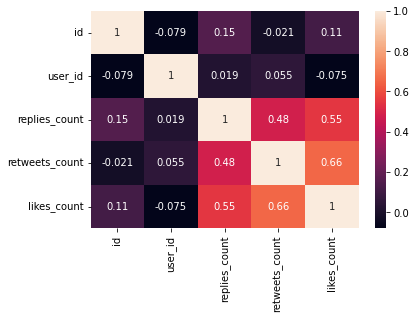

In [26]:
sn.heatmap(df.corr(), annot=True)
plt.show()

Se nota una fuerte correlacion entre los retweets_count y likes_counts, lo que quiere decir que a maryo catidad de likes tiene el post, mayor es ka posibilidad de ser retweeteado. En menor medida podemos observar corelacion entre likes_counts y replies_count, donde es aplicable perfectamente la lógica del caso anterior.

## 4. Utiliza un modelo pre-entrenado para determinar el sentimiento de los 3 tweets con mayor repercusión. Preguntas:

#### Eliminacion de signos de puntuación

In [27]:
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df['clean_tweet'] = df['clean_tweet'].apply(signs_tweets)
df['clean_tweet'].head()

0    quieres formarte profesiones futuro actualidad...
1    cbusquets hola thebridge_tech da opción pagar ...
2    me encantaría saber enseñan estadística super ...
3    ciclo conferencias inteligencia artificial res...
4    del periodismo marketing digital 🤸 historia bl...
Name: clean_tweet, dtype: object

#### Eliminación de emojis.

In [28]:
df['clean_tweet'] = df['clean_tweet'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
df['clean_tweet']

0      quieres formarte profesiones futuro actualidad...
1      cbusquets hola thebridge_tech da opcin pagar v...
2      me encantara saber ensean estadstica super cur...
3      ciclo conferencias inteligencia artificial res...
4      del periodismo marketing digital  historia bla...
                             ...                        
306    descubre experiencia dani  dani estudi #fp #de...
307    hoy sper visita oficinas thebridge_techprimera...
308    los emprendedores profesionales digitales futu...
309    hoy sper visita oficinas thebridge_techprimera...
310    empezamos sigue  #desafiodetripulaciones #sevi...
Name: clean_tweet, Length: 311, dtype: object

#### Eliminación de Links

In [29]:
def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df['clean_tweet'] = df['clean_tweet'].apply(remove_links)

#### Stemmer

In [30]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df['clean_tweet'] = df['clean_tweet'].apply(spanish_stemmer)
df['clean_tweet'].head()

0    quier formart profesion futur actual acuerd ca...
1    cbusquets hol thebridge_tech da opcin pag vez ...
2    me encant sab ense estadst sup curs dat scienc...
3    cicl conferent inteligent artificial respons c...
4    del period marketing digital histori blanc gme...
Name: clean_tweet, dtype: object

In [31]:
df.head()

,id,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,clean_tweet
0,1478637395289378817,2022-01-05,966573471663828992,pymesmagazine,PymesMagazine,¿Quieres formarte en una de las profesiones qu...,0,0,3,quier formart profesion futur actual acuerd ca...
1,1479787660910768132,2022-01-08,10045342,cmarchena,Carlos A. Marchena,"@cbusquets Hola, @TheBridge_Tech te da la opci...",0,0,4,cbusquets hol thebridge_tech da opcin pag vez ...
2,1480228635294449667,2022-01-09,183583012,ing_titiritero,Ingeniero Titiritero,Me encantaría saber que les enseñan sobre esta...,0,0,0,me encant sab ense estadst sup curs dat scienc...
3,1481340966866989063,2022-01-12,41545659,nodosenlared,Mario Lopez de Avila,Ciclo de Conferencias sobre Inteligencia Artif...,0,1,6,cicl conferent inteligent artificial respons c...
4,1483469787078533123,2022-01-18,1162694149956603904,thebridge_tech,The Bridge,Del periodismo al marketing digital 🤸 esta es ...,0,0,0,del period marketing digital histori blanc gme...


### Cargamos el modelo

In [32]:
import pickle

In [33]:
with open('data/output/finished_model.model', "rb") as archivo_entrada:
    pretrained_model = pickle.load(archivo_entrada)

c:\Users\Rafi\Anaconda3\envs\aws_evn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Rafi\Anaconda3\envs\aws_evn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Rafi\Anaconda3\envs\aws_evn\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 1.1.1. This might lead to breaking code or i

In [34]:
df.iloc[256]['tweet']

'@HeavyMental_es @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Recuenco, el héroe que no merecemos, pero el que necesitamos...  https://t.co/ajOJwjO5BD'

In [35]:
df.iloc[244]['tweet']

'@joobid @HeavyMental_es @TheBridge_Tech @GuillermoDeHaro Déjalo cortocircuitado en Always on.'

In [36]:
df.iloc[195]['tweet']

'@HeavyMental_es @TheBridge_Tech @GuillermoDeHaro @Recuenco @Alienta Me comentan por línea interna que habrá demostración estoica en vivo.'

In [37]:
df.iloc[256]['clean_tweet']

'heavymental_ davidalayon recuenc _miki guillermodehar thebridge_tech recuenc hro merec necesit {link}'

In [38]:
df.iloc[244]['clean_tweet']

'joob heavymental_ thebridge_tech guillermodehar djal cortocircuit always on'

In [39]:
df.iloc[195]['clean_tweet']

'heavymental_ thebridge_tech guillermodehar recuenc alient me coment lne intern demostracin estoic viv'

In [40]:
predictions_1 = pretrained_model.predict([df.iloc[256]['clean_tweet']])
predictions_p1 = pretrained_model.predict_proba([df.iloc[256]['clean_tweet']])

In [53]:
text = pd.Series('El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech  https://t.co/z7hOVln8Bp')
test_clean = pd.DataFrame(text, columns=['content'])


test_clean['content_clean'] = pd.Series('el vid -- light mental edicin especial thebridge_tech {link}')

test_clean



,content,content_clean
0,El sentido de la vida ya no es 42 -- Light Men...,el vid -- light mental edicin especial thebrid...


In [51]:
text = pd.Series('@joobid @HeavyMental_es @TheBridge_Tech @GuillermoDeHaro Déjalo cortocircuitado en Always on.')
test_clean1 = pd.DataFrame(text, columns=['content'])


test_clean1['content_clean'] = pd.Series('joob heavymental_ thebridge_tech guillermodehar djal cortocircuit always on')

test_clean1

,content,content_clean
0,@joobid @HeavyMental_es @TheBridge_Tech @Guill...,joob heavymental_ thebridge_tech guillermodeha...


In [61]:
text = pd.Series('@HeavyMental_es @TheBridge_Tech @GuillermoDeHaro @Recuenco @Alienta Me comentan por línea interna que habrá demostración estoica en vivo.')
test_clean2 = pd.DataFrame(text, columns=['content'])


test_clean2['content_clean'] = pd.Series('heavymental_ thebridge_tech guillermodehar recuenc alient me coment lne intern demostracin estoic viv')

test_clean2

,content,content_clean
0,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,heavymental_ thebridge_tech guillermodehar rec...


In [63]:
test_clean = pd.concat([test_clean, test_clean1, test_clean2 ], ignore_index=True)


In [64]:
test_clean

,content,content_clean
0,El sentido de la vida ya no es 42 -- Light Men...,el vid -- light mental edicin especial thebrid...
1,@joobid @HeavyMental_es @TheBridge_Tech @Guill...,joob heavymental_ thebridge_tech guillermodeha...
2,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,heavymental_ thebridge_tech guillermodehar rec...


In [78]:
predictions = pretrained_model.predict(test_clean['content_clean'])
test_clean['Polarity'] = pd.Series(predictions)
test_clean

,content,content_clean,Polarity
0,El sentido de la vida ya no es 42 -- Light Men...,el vid -- light mental edicin especial thebrid...,0
1,@joobid @HeavyMental_es @TheBridge_Tech @Guill...,joob heavymental_ thebridge_tech guillermodeha...,0
2,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,heavymental_ thebridge_tech guillermodehar rec...,0


In [89]:
predictions_proba

array([[0.69194235, 0.30805765],
       [0.54745853, 0.45254147],
       [0.67529191, 0.32470809]])

In [98]:
test_clean['content_clean'][2]

'heavymental_ thebridge_tech guillermodehar recuenc alient me coment lne intern demostracin estoic viv'

In [96]:
predictions_proba = pretrained_model.predict_proba(test_clean['content_clean'])



In [99]:
test_clean['Polarity_Pos'] = pd.Series(predictions_proba[0][0])
test_clean['Polarity_Neg'] = pd.Series(predictions_proba[0][1])
test_clean['Polarity_Pos'][1] = pd.Series(predictions_proba[1][0])
test_clean['Polarity_Neg'][1] = pd.Series(predictions_proba[1][1])
test_clean['Polarity_Pos'][2] = pd.Series(predictions_proba[2][0])
test_clean['Polarity_Neg'][2] = pd.Series(predictions_proba[2][1])
test_clean

C:\Users\Rafi\AppData\Local\Temp\ipykernel_19664\818972241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean['Polarity_Pos'][1] = pd.Series(predictions_proba[1][0])
C:\Users\Rafi\AppData\Local\Temp\ipykernel_19664\818972241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean['Polarity_Neg'][1] = pd.Series(predictions_proba[1][1])
C:\Users\Rafi\AppData\Local\Temp\ipykernel_19664\818972241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,content,content_clean,Polarity,Polarity_Pos,Polarity_Neg
0,El sentido de la vida ya no es 42 -- Light Men...,el vid -- light mental edicin especial thebrid...,0,0.691942,0.308058
1,@joobid @HeavyMental_es @TheBridge_Tech @Guill...,joob heavymental_ thebridge_tech guillermodeha...,0,0.547459,0.452541
2,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,heavymental_ thebridge_tech guillermodehar rec...,0,0.675292,0.324708


In [100]:
test_clean

,content,content_clean,Polarity,Polarity_Pos,Polarity_Neg
0,El sentido de la vida ya no es 42 -- Light Men...,el vid -- light mental edicin especial thebrid...,0,0.691942,0.308058
1,@joobid @HeavyMental_es @TheBridge_Tech @Guill...,joob heavymental_ thebridge_tech guillermodeha...,0,0.547459,0.452541
2,@HeavyMental_es @TheBridge_Tech @GuillermoDeHa...,heavymental_ thebridge_tech guillermodehar rec...,0,0.675292,0.324708


### ¿Cuáles son las predicciones? Interpreta los resultados. 

Todos los tweets analizados tienen como polaridad 0 y en gran medida son clasificados como positivos.

### ¿Qué variables han podido influir más en las predicciones del modelo?

La avariable evaluada fue content_clean, que fue el resultado final de limpiar los tweets.

### ¿Cómo podrías mejorar el modelo?

Entrenando el modelo con mucho mas muestras para que sea capaz de generalizar mejor. 

### ¿Qué otras oportunidades se te ocurren donde se podrían aplicar otros modelos de ML?

En este mismo sentido de análisis de sentimientos en comentarios, de hacerse con una gran cantidad de datos, podrían establecerse a que grupos pertenecen los mejores/peores comentarios, de manera tal que sea posible focalizar una mejora de la marca/producto objeto de análisis de acuerdo a las respuestas de los usuarios.